In [112]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('K_PAPER')
from neuron import h, gui
h.load_file('stdrun.hoc')
h.nrn_load_dll('./mod_shai/x86_64/libnrnmech.so')

h.load_file('import3d.hoc')

class MyCell:
    def __init__(self):
        morph_reader = h.Import3d_Neurolucida3()
        morph_reader.input('/home/nordentoft/Documents/Potassium_and_dendrites/supplementary_model/morphologies/cell3.asc')
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(self)

m = MyCell()


30799 lines read
	-69.999743 
	-69.999743 


NEURON: syntax error
 near line 2
 hoc_ac_ = 
           ^
        Graph[0].xexpr("")
      newphaseplane()
    doNotify()


Exception in gui thread


In [118]:
print(dir(m))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'all', 'apic', 'axon', 'dend', 'soma']


In [106]:
for soma in m.soma:
    soma.insert('Im')
    soma.insert('Ca_LVAst')
    soma.insert('Ca_HVA')
    soma.insert('CaDynamics_E2')
    soma.insert('SK_E2')
    soma.insert('SKv3_1')
    soma.insert('NaTs2_t')
    soma.insert('pas')
    soma.ek = -85
    soma.ena = 50
    soma.insert('Ih')
    soma.gIhbar_Ih = 0.0001*0.75
    soma.g_pas = 3e-6
    soma.gImbar_Im = 0.000008
    soma.decay_CaDynamics_E2 = 294.6795
    soma.gamma_CaDynamics_E2 = 0.000557
    soma.gCa_LVAstbar_Ca_LVAst = 0.000557
    soma.gCa_HVAbar_Ca_HVA = 0.000644
    soma.gSK_E2bar_SK_E2 = 0.09965
    soma.gSKv3_1bar_SKv3_1 = 0.338029
    soma.gNaTs2_tbar_NaTs2_t = 0.998912

for apic in m.apic:
    apic.insert('CaDynamics_E2')
    apic.insert('SK_E2')
    apic.insert('Ca_LVAst')
    apic.insert('Ca_HVA')
    apic.insert('SKv3_1')
    apic.insert('NaTs2_t')
    apic.insert('Im')
    apic.insert('Ih')
    apic.insert('pas')
    apic.ek =-85
    apic.ena = 50
    apic.cm = 2
    apic.g_pas = 6e-5
    apic.decay_CaDynamics_E2 = 35.725651 
    apic.gamma_CaDynamics_E2 = 0.000637 
    apic.gSK_E2bar_SK_E2 = 0.000002 
    apic.gCa_HVAbar_Ca_HVA = 0.000701 
    apic.gSKv3_1bar_SKv3_1 = 0.001808 
    apic.gNaTs2_tbar_NaTs2_t = 0.021489
    apic.gImbar_Im = 0.00099 
    apic.gIhbar_Ih =  .00015 //0.00001*1.5

for all in m.all:
    all.insert('pas')
    all.cm = 1
    all.Ra = 100
    all.e_pas = -90

for axon in m.axon:
    axon.insert('Im')
    axon.insert('Ca_LVAst') 
    axon.insert('Ca_HVA')
    axon.insert('CaDynamics_E2') 
    axon.insert('SKv3_1')
    axon.insert('SK_E2')
    axon.insert('K_Tst')
    axon.insert('K_Pst')
    axon.insert('Nap_Et2') 
    axon.insert('NaTa_t')
    axon.insert('Ih')
    axon.ek = -85
    axon.ena = 50
    axon.g_pas = 3e-5
    axon.gIhbar_Ih = 0.0001/2
    axon.gImbar_Im = 0.013322 
    axon.decay_CaDynamics_E2 = 277.300774 
    axon.gamma_CaDynamics_E2 = 0.000525 
    axon.gCa_LVAstbar_Ca_LVAst = 0.000813 
    axon.gCa_HVAbar_Ca_HVA = 0.000222 
    axon.gSKv3_1bar_SKv3_1 = 0.473799 
    axon.gSK_E2bar_SK_E2 = 0.000047 
    axon.gK_Tstbar_K_Tst = 0.077274 
    axon.gK_Pstbar_K_Pst = 0.188851 
    axon.gNap_Et2bar_Nap_Et2 = 0.005834 
    axon.gNaTa_tbar_NaTa_t = 3.89618 


    


In [107]:
stim = h.IClamp(0.5, sec=m.soma[0])
stim.delay = 100  # Start injecting current at 5 ms
stim.dur = 50   # Duration of current injection in ms
stim.amp = 100  # Amplitude of current injection in nA

V_vec = h.Vector().record(m.soma[0](0.0)._ref_v)
h.finitialize(-70)
h.tstop = 10
h.run()

0.0

(0.0, 400.0)

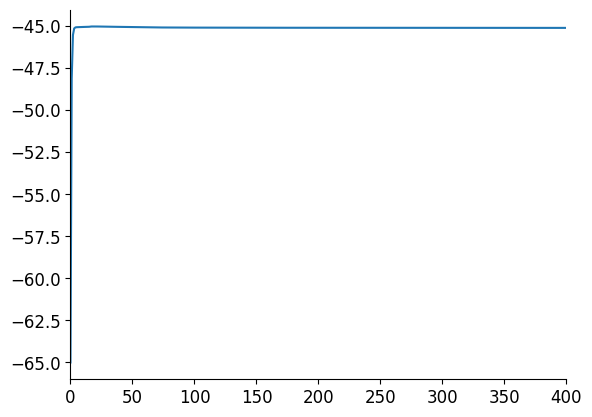

In [108]:
plt.plot(V_vec)
plt.xlim(0, 400)

